##### Binary Classification with keras
booking status is cancelled or not

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

##### Step 1 - Data ingestion

In [2]:
url1 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/booking_train.csv"
print(url1)

https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/booking_train.csv


In [42]:
import pandas as pd
df = pd.read_csv(url1)
df.head(2)
df = pd.read_csv('booking_train.csv')
df.head(2)

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0


##### booking_status is target feature

##### Step 2 - Perform basic data quality checks

In [45]:
df.duplicated().sum()
df.isna().sum()

id                                      0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

id                                      0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42100 entries, 0 to 42099
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    42100 non-null  int64  
 1   no_of_adults                          42100 non-null  int64  
 2   no_of_children                        42100 non-null  int64  
 3   no_of_weekend_nights                  42100 non-null  int64  
 4   no_of_week_nights                     42100 non-null  int64  
 5   type_of_meal_plan                     42100 non-null  int64  
 6   required_car_parking_space            42100 non-null  int64  
 7   room_type_reserved                    42100 non-null  int64  
 8   lead_time                             42100 non-null  int64  
 9   arrival_year                          42100 non-null  int64  
 10  arrival_month                         42100 non-null  int64  
 11  arrival_date   

##### Step 3 - Seperate X and Y(booking_status)

In [46]:
X = df.drop(columns = ["id", "booking_status"])
Y = df["booking_status"]

In [8]:
X.head(2)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0
1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0


In [47]:
Y.head(2)

0    0
1    0
Name: booking_status, dtype: int64

##### Step 4 - Apply Train Test Split

In [48]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.2, random_state=42)

In [50]:
xtrain.shape

(33680, 17)

In [49]:
xtest.shape

(8420, 17)

##### Preprocess X data

In [51]:
xtrain.dtypes

no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                         int64
required_car_parking_space                int64
room_type_reserved                        int64
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                       int64
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
dtype: object

In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [71]:
num_pipe = make_pipeline(
    SimpleImputer(strategy = "median"),
    StandardScaler()
).set_output(transform = "pandas")

In [73]:
num_pipe.fit(xtrain)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('simpleimputer', ...), ('standardscaler', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"missing_values missing_values: int, float, str, np.nan, None or pandas.NA, default=np.nanThe placeholder for the missing values. All occurrences of`missing_values` will be imputed. For pandas' dataframes withnullable integer dtypes with missing values, `missing_values`can be set to either `np.nan` or `pd.NA`.",nan
,"strategy strategy: str or Callable, default='mean'The imputation strategy.- If ""mean"", then replace missing values using the mean along each column. Can only be used with numeric data.- If ""median"", then replace missing values using the median along each column. Can only be used with numeric data.- If ""most_frequent"", then replace missing using the most frequent value along each column. Can be used with strings or numeric data. If there is more than one such value, only the smallest is returned.- If ""constant"", then replace missing values with fill_value. Can be used with strings or numeric data.- If an instance of Callable, then replace missing values using the scalar statistic returned by running the callable over a dense 1d array containing non-missing values of each column... versionadded:: 0.20 strategy=""constant"" for fixed value imputation... versionadded:: 1.5 strategy=callable for custom value imputation.",'median'
,"fill_value fill_value: str or numerical value, default=NoneWhen strategy == ""constant"", `fill_value` is used to replace alloccurrences of missing_values. For string or object data types,`fill_value` must be a string.If `None`, `fill_value` will be 0 when imputing numericaldata and ""missing_value"" for strings or object data types.",None
,"copy copy: bool, default=TrueIf True, a copy of X will be created. If False, imputation willbe done in-place whenever possible. Note that, in the following cases,a new copy will always be made, even if `copy=False`:- If `X` is not an array of floating values;- If `X` is encoded as a CSR matrix;- If `add_indicator=True`.",True
,"add_indicator add_indicator: bool, default=FalseIf True, a :class:`MissingIndicator` transform will stack onto outputof the imputer's transform. This allows a predictive estimatorto account for missingness despite impu

In [17]:
xtrain_pre = num_pipe.transform(xtrain)
xtrain_pre.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
15559,0.153093,-0.315818,-0.998671,0.419484,-0.406750,-0.161392,0.690057,-0.480324,0.408029,1.205109,-1.562259,-1.150637,-0.174567,-0.060488,-0.102027,-1.202736,1.839049
32783,0.153093,-0.315818,0.130180,1.118381,-0.406750,-0.161392,0.690057,-0.381869,0.408029,1.558639,1.133508,0.429202,-0.174567,-0.060488,-0.102027,0.188230,0.550609
11797,2.050146,-0.315818,-0.998671,0.419484,-0.406750,-0.161392,0.690057,-0.283413,0.408029,0.498049,-0.888317,0.429202,-0.174567,-0.060488,-0.102027,1.716675,-0.737831
39750,0.153093,-0.315818,-0.998671,-0.978311,3.001047,-0.161392,-0.516146,1.439556,0.408029,0.144519,-0.439023,-1.150637,-0.174567,-0.060488,-0.102027,0.279883,0.550609
28711,0.153093,-0.315818,1.259031,0.419484,-0.406750,-0.161392,0.690057,-0.111116,0.408029,0.851579,-1.000641,0.429202,-0.174567,-0.060488,-0.102027,0.746234,-0.737831


In [18]:
xtest_pre = num_pipe.transform(xtest)
xtest_pre.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
8768,0.153093,-0.315818,-0.998671,0.419484,-0.40675,-0.161392,-0.516146,-0.566473,0.408029,-2.330190,1.133508,-1.150637,-0.174567,-0.060488,-0.102027,-0.645541,0.550609
38340,0.153093,-0.315818,-0.998671,-0.279414,-0.40675,-0.161392,-0.516146,1.476477,0.408029,0.144519,-1.562259,0.429202,-0.174567,-0.060488,-0.102027,-0.287286,-0.737831
7104,0.153093,-0.315818,1.259031,-0.978311,-0.40675,-0.161392,4.308664,-0.554166,0.408029,-1.623131,1.021184,0.429202,-0.174567,-0.060488,-0.102027,0.000881,-0.737831
36898,0.153093,1.902482,1.259031,1.118381,-0.40675,-0.161392,-0.516146,-0.566473,0.408029,1.205109,-0.551346,0.429202,-0.174567,-0.060488,-0.102027,0.540554,3.127489
9747,0.153093,-0.315818,1.259031,0.419484,-0.40675,-0.161392,-0.516146,0.504230,0.408029,-1.269601,1.582802,0.429202,-0.174567,-0.060488,-0.102027,-0.368426,0.550609


##### Step 5 - Building the neural network

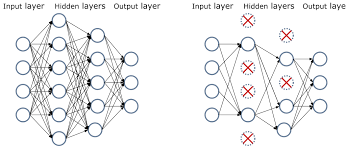

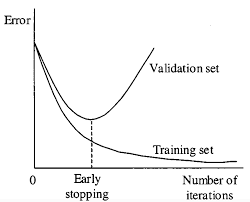

In [19]:
xtrain_pre.shape

(33680, 17)

In [24]:
!uv pip install tensorflow

Using Python 3.13.5 environment at: E:\ML-Wakad-Weekdays-5-7-pm-11th-Dec\.venv
Resolved 38 packages in 9.32s
Prepared 15 packages in 16.53s
         If the cache and target directories are on different filesystems, hardlinking may not be supported.
         If this is intentional, set `export UV_LINK_MODE=copy` or use `--link-mode=copy` to suppress this warning.
Installed 33 packages in 21.96s
 + absl-py==2.3.1
 + astunparse==1.6.3
 + certifi==2026.1.4
 + charset-normalizer==3.4.4
 + flatbuffers==25.12.19
 + gast==0.7.0
 + google-pasta==0.2.0
 + grpcio==1.76.0
 + h5py==3.15.1
 + idna==3.11
 + keras==3.13.0
 + libclang==18.1.1
 + markdown==3.10
 + markdown-it-py==4.0.0
 + markupsafe==3.0.3
 + mdurl==0.1.2
 + ml-dtypes==0.5.4
 + namex==0.1.0
 + opt-einsum==3.4.0
 + optree==0.18.0
 + protobuf==6.33.3
 + requests==2.32.5
 + rich==14.2.0
 + setuptools==80.9.0
 + tensorboard==2.20.0
 + tensorboard-data-server==0.7.2
 + tensorflow==2.20.0
 + termcolor==3.3.0
 + typing-extensions==4.15.0
 + ur

In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [27]:
model = Sequential(
    [
        Input(shape = (xtrain_pre.shape[1],)),
        Dense(32, activation = "relu"),
        Dropout(0.3),
        Dense(16, activation = "relu"),
        Dropout(0.2),
        Dense(1, activation = "sigmoid")
    ]
)

In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,121 (4.38 KB)

 Trainable params: 1,121 (4.38 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.compile(optimizer="adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [30]:
es = EarlyStopping(patience=5, restore_best_weights=True)

In [31]:
hist = model.fit(xtrain_pre, ytrain, validation_split=0.2, epochs=100, callbacks = [es])

Epoch 1/100
842/842 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7163 - loss: 0.5493 - val_accuracy: 0.7651 - val_loss: 0.4876
Epoch 2/100
842/842 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7617 - loss: 0.4976 - val_accuracy: 0.7714 - val_loss: 0.4790
Epoch 3/100
842/842 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7700 - loss: 0.4868 - val_accuracy: 0.7751 - val_loss: 0.4755
Epoch 4/100
842/842 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7753 - loss: 0.4802 - val_accuracy: 0.7776 - val_loss: 0.4743
Epoch 5/100
842/842 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7763 - loss: 0.4763 - val_accuracy: 0.7806 - val_loss: 0.4697
Epoch 6/100
842/842 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7797 - loss: 0.4717 - val_accuracy: 0.7830 - val_loss: 0.4694
Epoch 7/100
842/842 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7804 - loss: 0.4704 - val_accuracy: 0.7864 - val_loss: 0.4652
Epoch 8/100
842/842 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7842 - loss: 0.4690 - val_accu

# Plot the learning curve

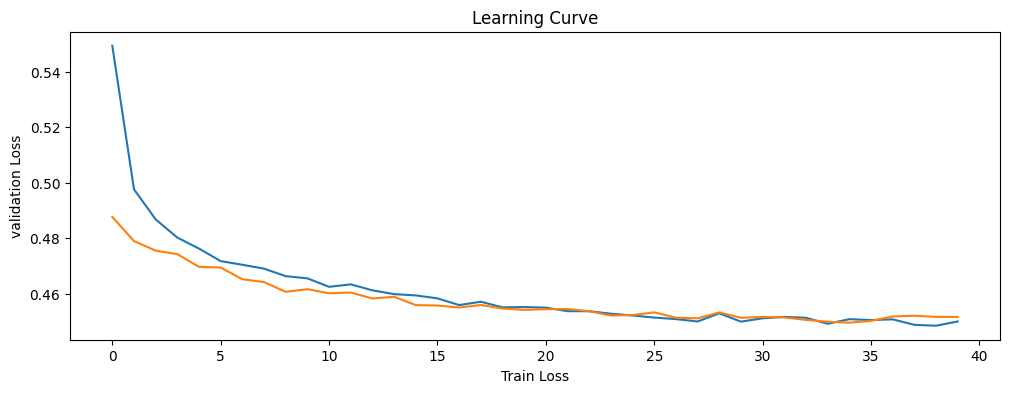

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.plot(hist.history["loss"], label = "Train Loss")
plt.plot(hist.history["val_loss"], label = "Validation Loss")
plt.title("Learning Curve")
plt.xlabel("Train Loss")
plt.ylabel("validation Loss")
plt.show()

# Evaluate the model

In [33]:
train_loss, train_acc = model.evaluate(xtrain_pre, ytrain)
print(f"Train Loss : {train_loss:.4f}")
print(f"Train Accuracy : {train_acc:.4f}")

1053/1053 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8034 - loss: 0.4343
Train Loss : 0.4343
Train Accuracy : 0.8034


In [34]:
test_loss, test_acc = model.evaluate(xtest_pre, ytest)
print(f"Test Loss : {test_loss:.4f}")
print(f"Test Accuracy : {test_acc:.4f}")

264/264 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8004 - loss: 0.4350
Test Loss : 0.4350
Test Accuracy : 0.8004


In [35]:
yprob_test = model.predict(xtest_pre)
yprob_test[0:5]

264/264 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[0.08713752],
       [0.93828714],
       [0.5722364 ],
       [0.03978722],
       [0.1931849 ]], dtype=float32)

In [36]:
ypred_test = [1 if prob >= 0.5 else 0 for prob in yprob_test]
ypred_test[0:5]

[0, 1, 1, 0, 0]

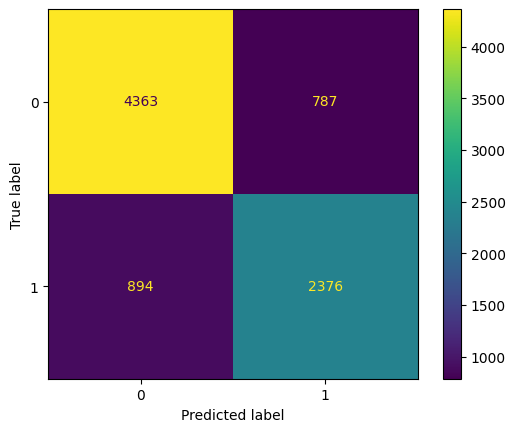

In [37]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(ytest, ypred_test)

In [38]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      5150
           1       0.75      0.73      0.74      3270

    accuracy                           0.80      8420
   macro avg       0.79      0.79      0.79      8420
weighted avg       0.80      0.80      0.80      8420



# Out of sample prediction

In [54]:
url2 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/booking_test.csv"
print(url2)

https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/booking_test.csv


In [61]:
xnew = pd.read_csv(url2)
xnew.head()
# xnew = pd.read_csv('booking_test.csv')
# xnew.head(3)

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,42100,3,0,1,4,0,0,1,111,2018,12,5,1,0,0,0,115.60,2
1,42101,2,0,0,3,0,0,0,22,2017,10,21,0,0,0,0,85.00,0
2,42102,2,2,0,1,0,0,3,18,2018,8,10,1,0,0,0,240.00,1
3,42103,2,0,0,3,0,0,0,88,2018,5,30,0,0,0,0,80.75,0
4,42104,1,0,0,2,2,0,0,7,2018,9,21,1,0,0,0,144.00,0


In [74]:
xnew2 = xnew.drop(columns = ["id"])
xnew2.dtypes

no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                         int64
required_car_parking_space                int64
room_type_reserved                        int64
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                       int64
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
dtype: object

In [75]:
xnew_pre = num_pipe.transform(xnew2)
xnew_pre.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2.050146,-0.315818,0.130180,1.118381,-0.406750,-0.161392,0.690057,0.085794,0.408029,1.558639,-1.225288,0.429202,-0.174567,-0.060488,-0.102027,0.296057,1.839049
1,0.153093,-0.315818,-0.998671,0.419484,-0.406750,-0.161392,-0.516146,-1.009522,-2.450806,0.851579,0.571890,-1.150637,-0.174567,-0.060488,-0.102027,-0.528818,-0.737831
2,0.153093,4.120782,-0.998671,-0.978311,-0.406750,-0.161392,3.102462,-1.058750,0.408029,0.144519,-0.663670,0.429202,-0.174567,-0.060488,-0.102027,3.649470,0.550609
3,0.153093,-0.315818,-0.998671,0.419484,-0.406750,-0.161392,-0.516146,-0.197265,0.408029,-0.916071,1.582802,-1.150637,-0.174567,-0.060488,-0.102027,-0.643384,-0.737831
4,-1.743959,-0.315818,-0.998671,-0.279414,3.001047,-0.161392,-0.516146,-1.194126,0.408029,0.498049,0.571890,0.429202,-0.174567,-0.060488,-0.102027,1.061627,-0.737831


In [76]:
probs = model.predict(xnew_pre)
probs[0:5]

878/878 ━━━━━━━━━━━━━━━━━━━━ 1s 929us/step


array([[0.11871941],
       [0.04632109],
       [0.4333546 ],
       [0.20433062],
       [0.69113505]], dtype=float32)

In [77]:
preds = [1 if p >= 0.5 else 0 for p in probs]
preds[0:5]

[0, 0, 0, 0, 1]

In [78]:
res = xnew[["id"]]
res

,id
0,42100
1,42101
2,42102
3,42103
4,42104
...,...
28063,70163
28064,70164
28065,70165
28066,70166


In [79]:
res["loan_status"] = preds
res["prob"] = probs.round(4)

In [80]:
res.to_csv("Loan_pred.csv", index=False)